# MNIST Data Classification


Linear Network Model

In [31]:
import torch.nn as nn

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet,self).__init__()
        self.layer=nn.Sequential(
            nn.Linear(28*28,10,bias=True),
            nn.Sigmoid()
        )
        
    def forward(self,x):
        return self.layer(x)
        

Train

In [32]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

GPU=True

mnist_train=dsets.MNIST(root='MNIST_data/',train=True,transform=transforms.ToTensor(),download=True)
mnist_test=dsets.MNIST(root='MNIST_data/',train=False,transform=transforms.ToTensor(),download=True)

batch_size=64

data_loader=DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True)

model=MyNet()

optimizer=torch.optim.Adam(model.parameters(),lr=0.1)
criterion=torch.nn.CrossEntropyLoss()

if GPU:
    model=model.to('cuda')
    criterion=criterion.to('cuda')

for epoch in range(15):
    avg_cost=0.0
    for X,Y in data_loader:
        X=X.view(-1,28*28)
        if GPU:
            X=X.to('cuda')
            Y=Y.to('cuda')
        
        optimizer.zero_grad()
        
        hypothesis=model(X)
        
        cost=criterion(hypothesis,Y)
        cost.backward()
        optimizer.step()
        
        avg_cost+=cost.item()
    
    avg_cost/=len(data_loader)
    print('Epoch {}, cost = {:.9f}'.format(epoch,avg_cost))

Epoch 0, cost = 1.591469754
Epoch 1, cost = 1.571132305
Epoch 2, cost = 1.569553419
Epoch 3, cost = 1.562904987
Epoch 4, cost = 1.561034728
Epoch 5, cost = 1.560374980
Epoch 6, cost = 1.561950907
Epoch 7, cost = 1.559554034
Epoch 8, cost = 1.556736662
Epoch 9, cost = 1.557407878
Epoch 10, cost = 1.556681979
Epoch 11, cost = 1.557002818
Epoch 12, cost = 1.553860056
Epoch 13, cost = 1.553480109
Epoch 14, cost = 1.553294342


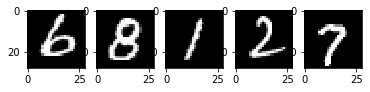

tensor([6, 8, 1, 2, 7], device='cuda:0')
accuracy = 0.8482285031847133


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

test_loader=DataLoader(dataset=mnist_test,batch_size=batch_size,shuffle=True)

accuracy=0.0
for X,Y in test_loader:
    X=X.view(-1,28*28)
    
    if GPU:
        X=X.to('cuda')
        Y=Y.to('cuda')
        
    prediction=model(X)
    
    accuracy+=(prediction.argmax(1)==Y).float().mean().item()
else:
    fig,(axes)=plt.subplots(1,5)
    
    for i,ax in enumerate(axes):
        ax.imshow(X[i].cpu().view(28,28),cmap='gray')
    plt.show()
    print(Y[:5].data)
accuracy/=len(test_loader)

print('accuracy = {}'.format(accuracy))
    

# CNN

CNN Network Model

In [21]:
import torch.nn as nn
import torch
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet,self).__init__()
        self.layer1=nn.Sequential(
            nn.Conv2d(1,32,3,2,1),
            nn.ReLU(),
            
            nn.Conv2d(32,64,3,2,1),
            nn.ReLU(),
            
            nn.Conv2d(64,128,3,2,1),
            nn.ReLU()
        )
        self.layer2=nn.Sequential(
            nn.Linear(128*4*4,128,bias=True),
            nn.Sigmoid(),
            nn.Linear(128,10,bias=True),
            nn.Sigmoid()
        )
        
    def forward(self,x):
        output=self.layer1(x)
        output=output.view(output.size(0),-1)
        output=self.layer2(output)
        
        return output

Train

In [19]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

GPU=True

mnist_train=dsets.MNIST(root='MNIST_data/',train=True,transform=transforms.ToTensor(),download=True)
mnist_test=dsets.MNIST(root='MNIST_data/',train=False,transform=transforms.ToTensor(),download=True)

batch_size=64

data_loader=DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True)

model=MyNet()

optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
criterion=torch.nn.CrossEntropyLoss()

if GPU:
    model=model.to('cuda')
    criterion=criterion.to('cuda')

for epoch in range(15):
    avg_cost=0.0
    for X,Y in data_loader:
        if GPU:
            X=X.to('cuda')
            Y=Y.to('cuda')
        
        optimizer.zero_grad()
        
        hypothesis=model(X)
        
        cost=criterion(hypothesis,Y)
        cost.backward()
        optimizer.step()
        
        avg_cost+=cost.item()
    
    avg_cost/=len(data_loader)
    print('Epoch {}, cost = {:.9f}'.format(epoch,avg_cost))

Start Training..
Epoch 0, cost = 1.580978695
Epoch 1, cost = 1.484290890
Epoch 2, cost = 1.475975146
Epoch 3, cost = 1.472314467
Epoch 4, cost = 1.469884751
Epoch 5, cost = 1.468033864
Epoch 6, cost = 1.466713879
Epoch 7, cost = 1.465647795
Epoch 8, cost = 1.465267396
Epoch 9, cost = 1.464732069
Epoch 10, cost = 1.464238420
Epoch 11, cost = 1.463862929
Epoch 12, cost = 1.463942931
Epoch 13, cost = 1.463349468
Epoch 14, cost = 1.463426393


Test

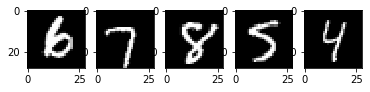

tensor([6, 7, 8, 5, 4], device='cuda:0')
accuracy = 0.9902468152866242


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

test_loader=DataLoader(dataset=mnist_test,batch_size=batch_size,shuffle=True)

accuracy=0.0
for X,Y in test_loader:    
    if GPU:
        X=X.to('cuda')
        Y=Y.to('cuda')
        
    prediction=model(X)
    
    accuracy+=(prediction.argmax(1)==Y).float().mean().item()
else:
    fig,(axes)=plt.subplots(1,5)
    
    for i,ax in enumerate(axes):
        ax.imshow(X[i].cpu().view(28,28),cmap='gray')
    plt.show()
    print(Y[:5].data)
accuracy/=len(test_loader)

print('accuracy = {}'.format(accuracy))
    